# South African Language Identification!


## EDSA 2021 Classification Hackation

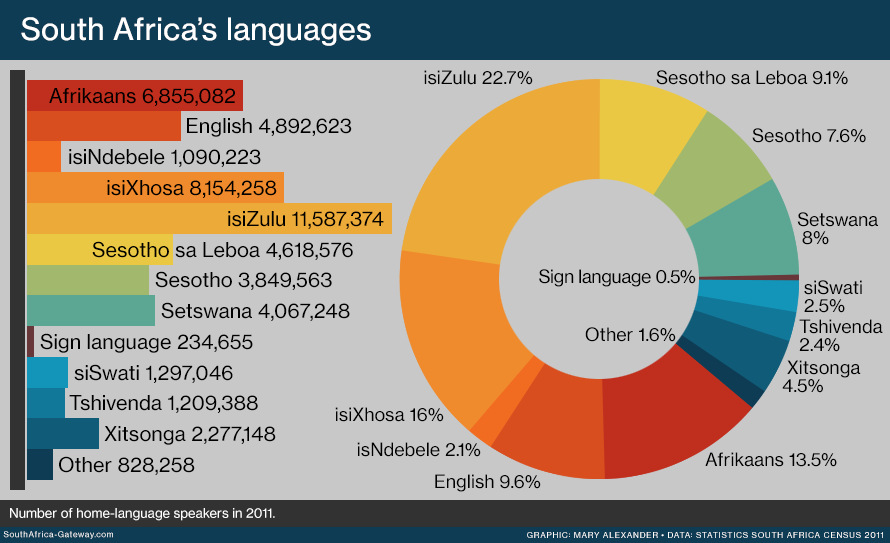

## Introduction
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

 # 1. Loading Libraries
 All Python capabilities are not loaded into our working environment by default (even those that are already installed in your system). So, we import each and every library that we want to use.

In [77]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE,ADASYN
from collections import Counter

In [2]:
test_data = pd.read_csv("test_set.csv")
test_data.head(10)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [3]:
train_data = pd.read_csv("train_set.csv")
train_data.head(10)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [4]:
train_data["lang_id"].value_counts()

xho    3000
afr    3000
sot    3000
zul    3000
eng    3000
ssw    3000
nbl    3000
tso    3000
ven    3000
tsn    3000
nso    3000
Name: lang_id, dtype: int64

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [6]:
train_data.shape

(33000, 2)

In [7]:
langid = train_data['lang_id'].unique()
langid

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

In [8]:
Number_of_Languages = len(langid)
print(Number_of_Languages)

11


# 2. Separating Independent and Dependent features
Separating the dependent and independent variables, here text data is the independent variable and the language name is the dependent variable.

In [9]:
X = train_data["text"]
y = train_data["lang_id"]

# 3. Text Preprocessing
Text preprocessing technique was used to remove unwanted symbols, numbers which may affect the quality of our model.

### Punctuation Removal:

In [10]:
string.punctuation

#defining the function to remove punctuation

def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text

train_data['clean_msg']= train_data['text'].apply(lambda x:remove_punctuation(x))
train_data.head()

,lang_id,text,clean_msg
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### Lowering the text:
This the most common preprocessing steps where the text is converted into the same case preferably lower case. 

In [11]:
train_data['msg_lower']= train_data['clean_msg'].apply(lambda x: x.lower())
train_data.head()

,lang_id,text,clean_msg,msg_lower
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### Tokenization: 
In this step, the text is split into smaller units

In [62]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
train_data['msg_tokenied']= train_data['msg_lower'].apply(lambda x: tokenization(x))
train_data.head()

,lang_id,text,clean_msg,msg_lower,msg_tokenied
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...,umgaqosiseko wenza amalungiselelo kumaziko axh...,[umgaqosiseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...,idha iya kuba nobulumko bokubeka umsebenzi nap...,[idha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...,the province of kwazulunatal department of tra...,[the province of kwazulunatal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...,[o netefatša gore o ba file dilo ka moka tše l...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,[khomishini ya ndinganyiso ya mbeu yo ewa maan...


### Stop word removal:
Are removed from the text as they do not add any value to the analysis. These words carry less or no meaning.

In [63]:
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

train_data['no_stopwords']= train_data['msg_tokenied'].apply(lambda x:remove_stopwords(x))
train_data.head()

,lang_id,text,clean_msg,msg_lower,msg_tokenied,no_stopwords
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...,umgaqosiseko wenza amalungiselelo kumaziko axh...,[umgaqosiseko wenza amalungiselelo kumaziko ax...,[umgaqosiseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...,idha iya kuba nobulumko bokubeka umsebenzi nap...,[idha iya kuba nobulumko bokubeka umsebenzi na...,[idha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...,the province of kwazulunatal department of tra...,[the province of kwazulunatal department of tr...,[the province of kwazulunatal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...,[o netefatša gore o ba file dilo ka moka tše l...,[o netefatša gore o ba file dilo ka moka tše l...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,[khomishini ya ndinganyiso ya mbeu yo ewa maan...,[khomishini ya ndinganyiso ya mbeu yo ewa maan...


### Train Test Splitting
We preprocessed our input and output variable. The next step is to create the training set, for training the model and test set, for evaluating the test set. For this process, we are using a train test split. The train set is plit 80% and test set 20%.

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 42)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26400,)
(6600,)
(26400,)
(6600,)


### Tfid Vectorizer 

In [65]:
# building and fitting the vectorizer
df_train = train_data.copy()
vect = TfidfVectorizer(ngram_range=(1,3), sublinear_tf=True, smooth_idf = True, min_df = 1, max_df = 0.95, analyzer = 'word') 
                       
# transforming the 'clean_txt' column
X_clean_txt = vect.fit_transform(df_train.text)

In [85]:
# Use these values for 'X' and 'y' in 'train_test_split':

X = train_data["text"]
y = train_data["lang_id"]

In [67]:
# Splitting the previously defined features and label of your dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_clean_txt, y, test_size=0.2, random_state=42)

In [87]:

smote = SMOTE(random_state=0)

adasyn = ADASYN(random_state=0)
X_train2, y_train2 = smote.fit_resample(X_clean_txt, y)
#X_train2, y_train2 = ADASYN.fit_resample(X_clean_txt,y)
print(sorted(Counter(y_train).items()))

print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

[('afr', 2417), ('eng', 2385), ('nbl', 2417), ('nso', 2375), ('sot', 2382), ('ssw', 2416), ('tsn', 2402), ('tso', 2439), ('ven', 2366), ('xho', 2391), ('zul', 2410)]
(33000, 1548847)
(6600, 1548847)
(33000,)
(6600,)


#### Vectorising test data

In [79]:
clean_message_tfidf = vect.transform(test_data['text'])

# 4. Model Training and Validation

## 4.1 Linear regression model

In [18]:
lr = LogisticRegression()

# Train the model
lr.fit(X_train2, y_train2)

pred = lr.predict(X_test2)

print('Accuracy Score is: ' + str(accuracy_score(y_test2,pred)))
print('Precision Score is : ' ,precision_score(y_test2,pred, average='weighted'))
print('Recall Score is: ',recall_score(y_test,pred, average='weighted'))
print('F1 Score is: ', f1_score(y_test2,pred, average='weighted'))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test2,pred)))


Accuracy Score is: 0.9943939393939394
Precision Score is :  0.9944148485160975
Recall Score is:  0.9943939393939394
F1 Score is:  0.9943965400822501
Confusion Matrix : 
[[578   0   0   0   0   4   0   0   0   1   0]
 [  0 615   0   0   0   0   0   0   0   0   0]
 [  0   0 574   0   0   0   0   0   0   4   5]
 [  0   0   0 622   0   0   2   0   0   1   0]
 [  0   0   0   0 618   0   0   0   0   0   0]
 [  0   0   0   0   0 581   0   0   0   0   3]
 [  0   0   0   0   0   1 597   0   0   0   0]
 [  0   0   0   0   0   0   0 561   0   0   0]
 [  0   0   0   0   0   0   0   0 634   0   0]
 [  0   0   1   0   0   0   0   0   0 605   3]
 [  0   1   4   0   0   1   0   0   0   6 578]]


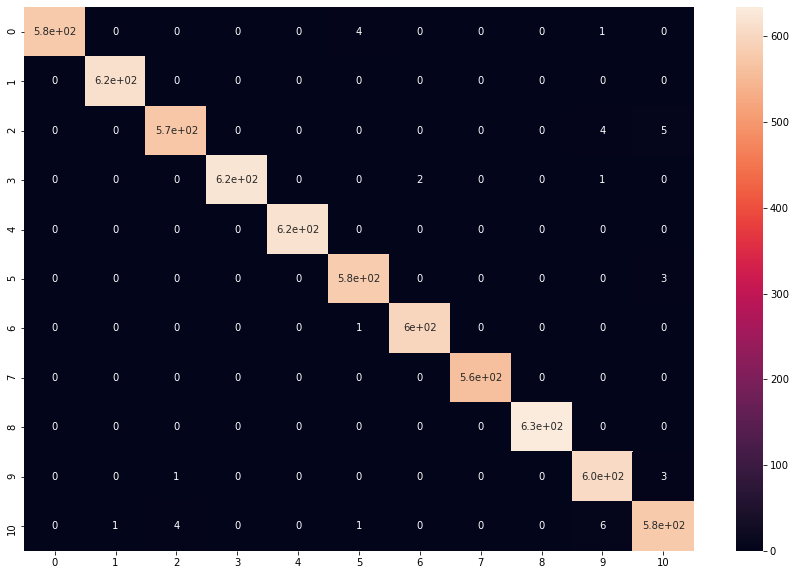

In [19]:
cm = confusion_matrix(y_test2,pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

#### Hyperparameter tuning Logistic Regression Model 

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty': ['l2'],
                'C':[1,2,],
                'solver':['newton-cg'],
                'max_iter':[100, 1000]}]
    
lmodel = GridSearchCV(lr,param_grid = param_grid, cv = 3, verbose = True, n_jobs = 1) 

lmodel.fit(X_train2, y_train2)

pred1 = lmodel.predict(X_test2)

print('Accuracy Score is: ' + str(accuracy_score(y_test2,pred1)))
print('Precision Score is : ' ,precision_score(y_test2,pred1, average='weighted'))
print('Recall Score is: ',recall_score(y_test2,pred1, average='weighted'))
print('F1 Score is: ', f1_score(y_test2, pred1, average='weighted'))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test2,pred1)))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Accuracy Score is: 0.9951515151515151
Precision Score is :  0.995161766286988
Recall Score is:  0.9951515151515151
F1 Score is:  0.9951525008166021
Confusion Matrix : 
[[579   0   0   0   0   3   0   0   0   1   0]
 [  0 615   0   0   0   0   0   0   0   0   0]
 [  0   0 575   0   0   0   0   0   0   3   5]
 [  0   0   0 622   1   0   2   0   0   0   0]
 [  0   0   0   0 618   0   0   0   0   0   0]
 [  0   0   0   0   0 582   0   0   0   0   2]
 [  0   0   0   0   0   1 597   0   0   0   0]
 [  0   0   0   0   0   0   0 561   0   0   0]
 [  0   0   0   0   0   0   0   0 634   0   0]
 [  0   0   1   0   0   0   0   0   0 605   3]
 [  0   1   4   0   0   0   0   0   0   5 580]]


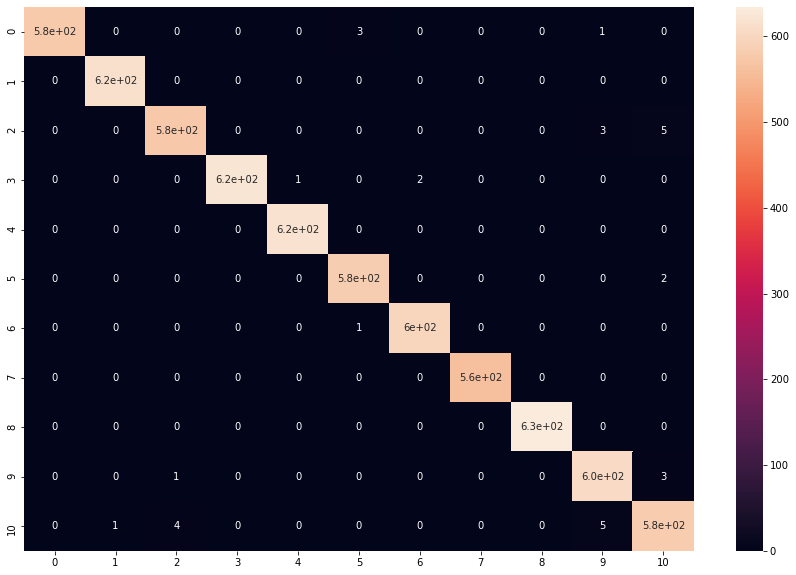

In [24]:
cm = confusion_matrix(y_test,pred1)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

## 4.2  MultinomialNB model

In [17]:
model = MultinomialNB()

model.fit(X_train2, y_train2)

y_pred = model.predict(X_test2)

#cm = confusion_matrix(y_test, y_pred)
print('Accuracy Score is: ' + str(accuracy_score(y_test2,y_pred)))
print('Precision Score is : ' ,precision_score(y_test2,y_pred, average='weighted'))
print('Recall Score is: ',recall_score(y_test2,y_pred, average='weighted'))
print('F1 Score is: ', f1_score(y_test2, y_pred, average='weighted'))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test2,y_pred)))


Accuracy Score is: 0.9978787878787879
Precision Score is :  0.997885667203994
Recall Score is:  0.9978787878787879
F1 Score is:  0.9978789947370462
Confusion Matrix : 
[[583   0   0   0   0   0   0   0   0   0   0]
 [  0 615   0   0   0   0   0   0   0   0   0]
 [  1   1 580   0   0   0   0   0   0   0   1]
 [  0   0   0 624   1   0   0   0   0   0   0]
 [  0   0   0   0 618   0   0   0   0   0   0]
 [  0   1   0   0   0 583   0   0   0   0   0]
 [  1   0   0   0   0   0 597   0   0   0   0]
 [  0   0   0   0   0   0   0 561   0   0   0]
 [  0   0   0   0   0   0   0   0 634   0   0]
 [  0   1   1   0   0   0   0   0   0 606   1]
 [  0   2   3   0   0   0   0   0   0   0 585]]


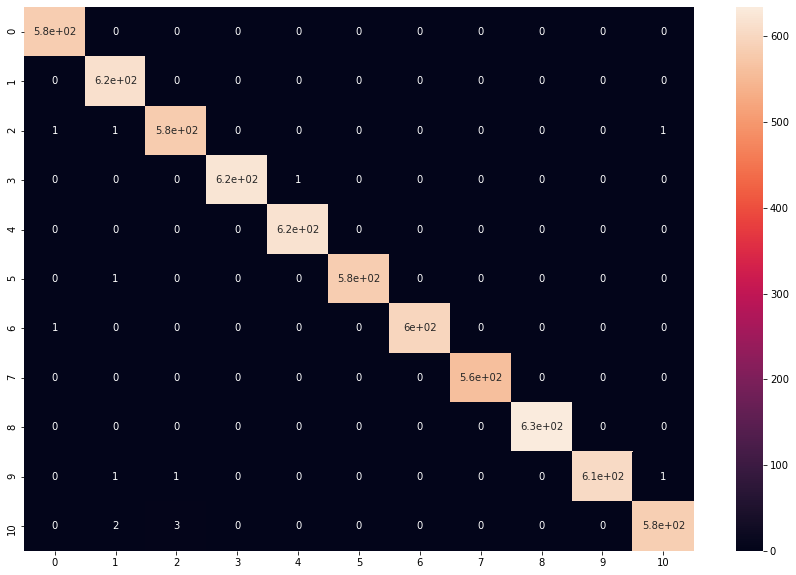

In [27]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

#### Hyperparameter tuning Multinomial naive bayes Model 

In [80]:
param_grid = {'alpha': [0.1, 2, 4, 6, 8, 9, 10]}  
#param_grid = {'alpha': [0.1, 2, 4, 6, 8, 9, 10, 12, 14, 16, 18, 20]}  

mmodel = GridSearchCV(model,param_grid = param_grid, cv = 5, verbose = True, n_jobs = 1) 

mmodel.fit(X_train2, y_train2)

pred8 = mmodel.predict(X_test2)

print('Accuracy Score is: ' + str(accuracy_score(y_test2,pred8)))
print('Precision Score is : ' ,precision_score(y_test2,pred8, average='weighted'))
print('Recall Score is: ',recall_score(y_test2,pred8, average='weighted'))
print('F1 Score is: ', f1_score(y_test2, pred8, average='weighted'))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test2,pred8)))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Accuracy Score is: 1.0
Precision Score is :  1.0
Recall Score is:  1.0
F1 Score is:  1.0
Confusion Matrix : 
[[583   0   0   0   0   0   0   0   0   0   0]
 [  0 615   0   0   0   0   0   0   0   0   0]
 [  0   0 583   0   0   0   0   0   0   0   0]
 [  0   0   0 625   0   0   0   0   0   0   0]
 [  0   0   0   0 618   0   0   0   0   0   0]
 [  0   0   0   0   0 584   0   0   0   0   0]
 [  0   0   0   0   0   0 598   0   0   0   0]
 [  0   0   0   0   0   0   0 561   0   0   0]
 [  0   0   0   0   0   0   0   0 634   0   0]
 [  0   0   0   0   0   0   0   0   0 609   0]
 [  0   0   0   0   0   0   0   0   0   0 590]]


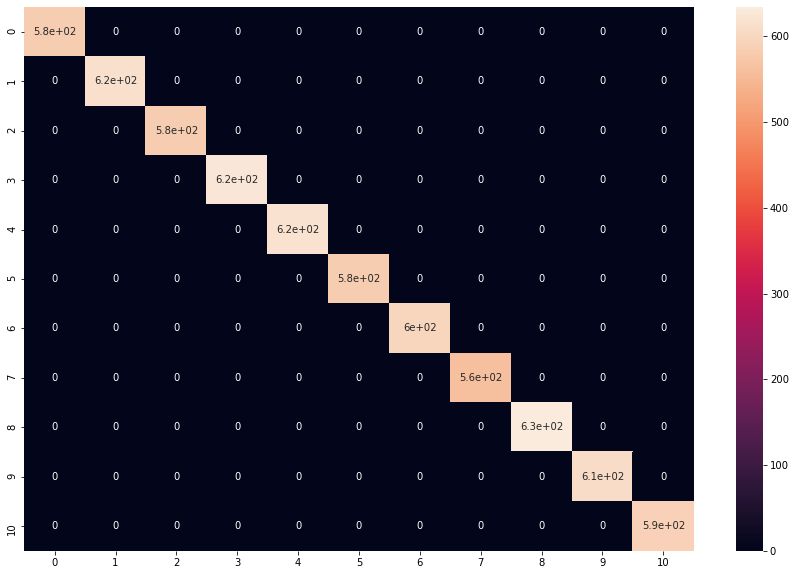

In [81]:
cm = confusion_matrix(y_test,pred8)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

## 4.3 Linear SVC Model  

In [88]:
#from sklearn.svm import LinearSVC, SVC

l_svc = LinearSVC()

l_svc.fit(X_train2, y_train2)

pred_svc = l_svc.predict(X_test2)

print('Accuracy Score is: ' + str(accuracy_score(y_test2,pred_svc)))
print('Precision Score is : ' ,precision_score(y_test2,pred_svc, average='weighted'))
print('Recall Score is: ',recall_score(y_test2,pred_svc, average='weighted'))
print('F1 Score is: ', f1_score(y_test2, pred_svc, average='weighted'))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test2,pred_svc)))

Accuracy Score is: 1.0
Precision Score is :  1.0
Recall Score is:  1.0
F1 Score is:  1.0
Confusion Matrix : 
[[583   0   0   0   0   0   0   0   0   0   0]
 [  0 615   0   0   0   0   0   0   0   0   0]
 [  0   0 583   0   0   0   0   0   0   0   0]
 [  0   0   0 625   0   0   0   0   0   0   0]
 [  0   0   0   0 618   0   0   0   0   0   0]
 [  0   0   0   0   0 584   0   0   0   0   0]
 [  0   0   0   0   0   0 598   0   0   0   0]
 [  0   0   0   0   0   0   0 561   0   0   0]
 [  0   0   0   0   0   0   0   0 634   0   0]
 [  0   0   0   0   0   0   0   0   0 609   0]
 [  0   0   0   0   0   0   0   0   0   0 590]]


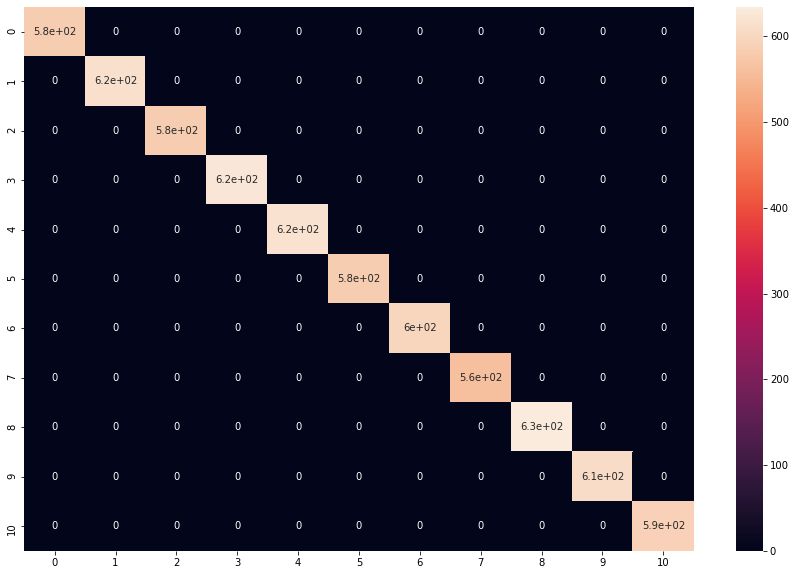

In [89]:
cm = confusion_matrix(y_test,pred_svc)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

## 4.4 Decision Tree model

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

DecisionTC = DecisionTreeClassifier()

DecisionTC.fit(X_train2, y_train2)

pred2 = DecisionTC.predict(X_test2)

print('Accuracy Score is: ' + str(accuracy_score(y_test2,pred2)))
print('Precision Score is : ' ,precision_score(y_test2,pred2, average='weighted'))
print('Recall Score is: ',recall_score(y_test2,pred2, average='weighted'))
print('F1 Score is: ', f1_score(y_test2, pred2, average='weighted'))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test2,pred2)))

Accuracy Score is: 0.9501515151515152
Precision Score is :  0.9508236561059612
Recall Score is:  0.9501515151515152
F1 Score is:  0.9502675351206891
Confusion Matrix : 
[[578   0   0   0   1   4   0   0   0   0   0]
 [  1 613   0   0   0   1   0   0   0   0   0]
 [  1   1 514   0   2  16   0   0   0  19  30]
 [  0   0   1 602   3   1  17   0   0   1   0]
 [  0   0   2   2 612   0   2   0   0   0   0]
 [  0   2  13   0   2 529   0   4   1   2  31]
 [  1   1   1   2   4   0 588   0   0   0   1]
 [  1   0   1   0   0   3   0 555   0   0   1]
 [  0   0   0   0   2   2   0   2 628   0   0]
 [  0   2  16   0   0  27   0   1   0 537  26]
 [  0   1  21   0   3  38   0   0   0  12 515]]


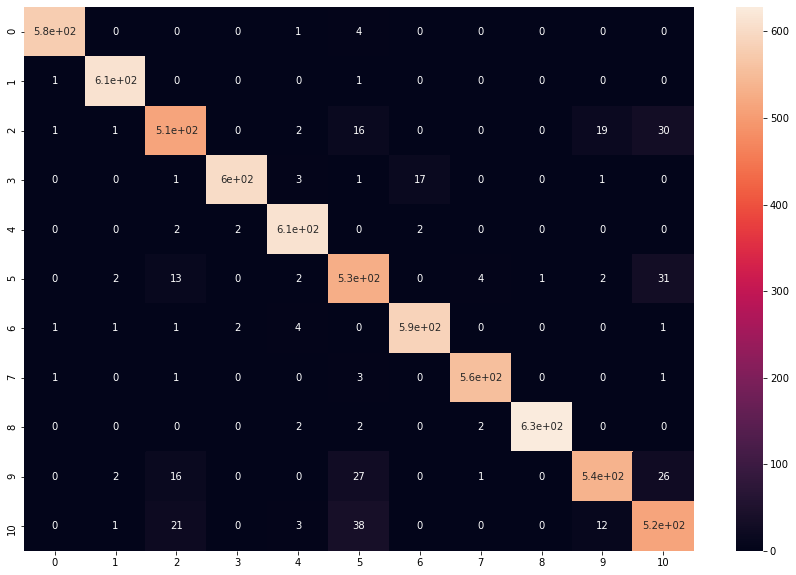

In [34]:
cm = confusion_matrix(y_test,pred2)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

## 4.4 MLP model  

In [ ]:
MLPC = MLPClassifier(alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=42)
    
MLPC.fit(X_train2, y_train2)

pred3 = MLPC.predict(X_test2)

print('Accuracy Score is: ' + str(accuracy_score(y_test2,pred3)))
print('Precision Score is : ' ,precision_score(y_test2,pred3, average='weighted'))
print('Recall Score is: ',recall_score(y_test2,pred3, average='weighted'))
print('F1 Score is: ', f1_score(y_test2, pred3, average='weighted'))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test2,pred3)))

In [ ]:
cm = confusion_matrix(y_test,pred3)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

# 5. Submission

In [90]:
submission = pd.DataFrame(test_data['index'])
submission['lang_id'] = l_svc.predict(vect.transform(test_data['text']))
submission.to_csv('Results_LSVC.csv', index=False)

#### Hyperparameter tuning MultinomialNB model